## **Assignment 1 - ML Data Cleaning and Feature Selection**


**The Bank Customer Churn dataset contains the following features:**

1.CustomerID

2.Credit Score

3.Country

4.Gender

5.Age

6.Tenure

7.Balance

8.Product Number

9.Credit Card

10.Active Member

11.Estimated Salary

12.Churn

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import io

In [3]:
from google.colab import files
data = files.upload()

Saving Bank_Customer_Churn_Prediction.csv to Bank_Customer_Churn_Prediction.csv


**Importing the dataset and making a copy (df)**

In [4]:
dataset_original = pd.read_csv(io.BytesIO(data['Bank_Customer_Churn_Prediction.csv']))
df = dataset_original.copy()

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**What are the data types? (Only numeric and categorical)**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Categorical Columns:**

1.country

2.gender

**Numerical Columns:**

1.customer_id

2.credit_score

3.age

4.tenure

5.balance

6.products number

7.credit card

8.active member

9.estimated salary

10.churn



**Are there missing values?**

In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**There are NO missing values in the dataset, hence no imputation method is needed**

In [8]:
#removing column customerid as it will not have an impact on our analysis
df.drop(columns=['customer_id'], inplace=True)

In [9]:
#numeric columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

In [10]:
#categorical columns
catg_cols = df.select_dtypes('object').columns
catg_cols

Index(['country', 'gender'], dtype='object')

In [11]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Numerical Column Distribution

**What are the likely distributions of the numeric variables?**

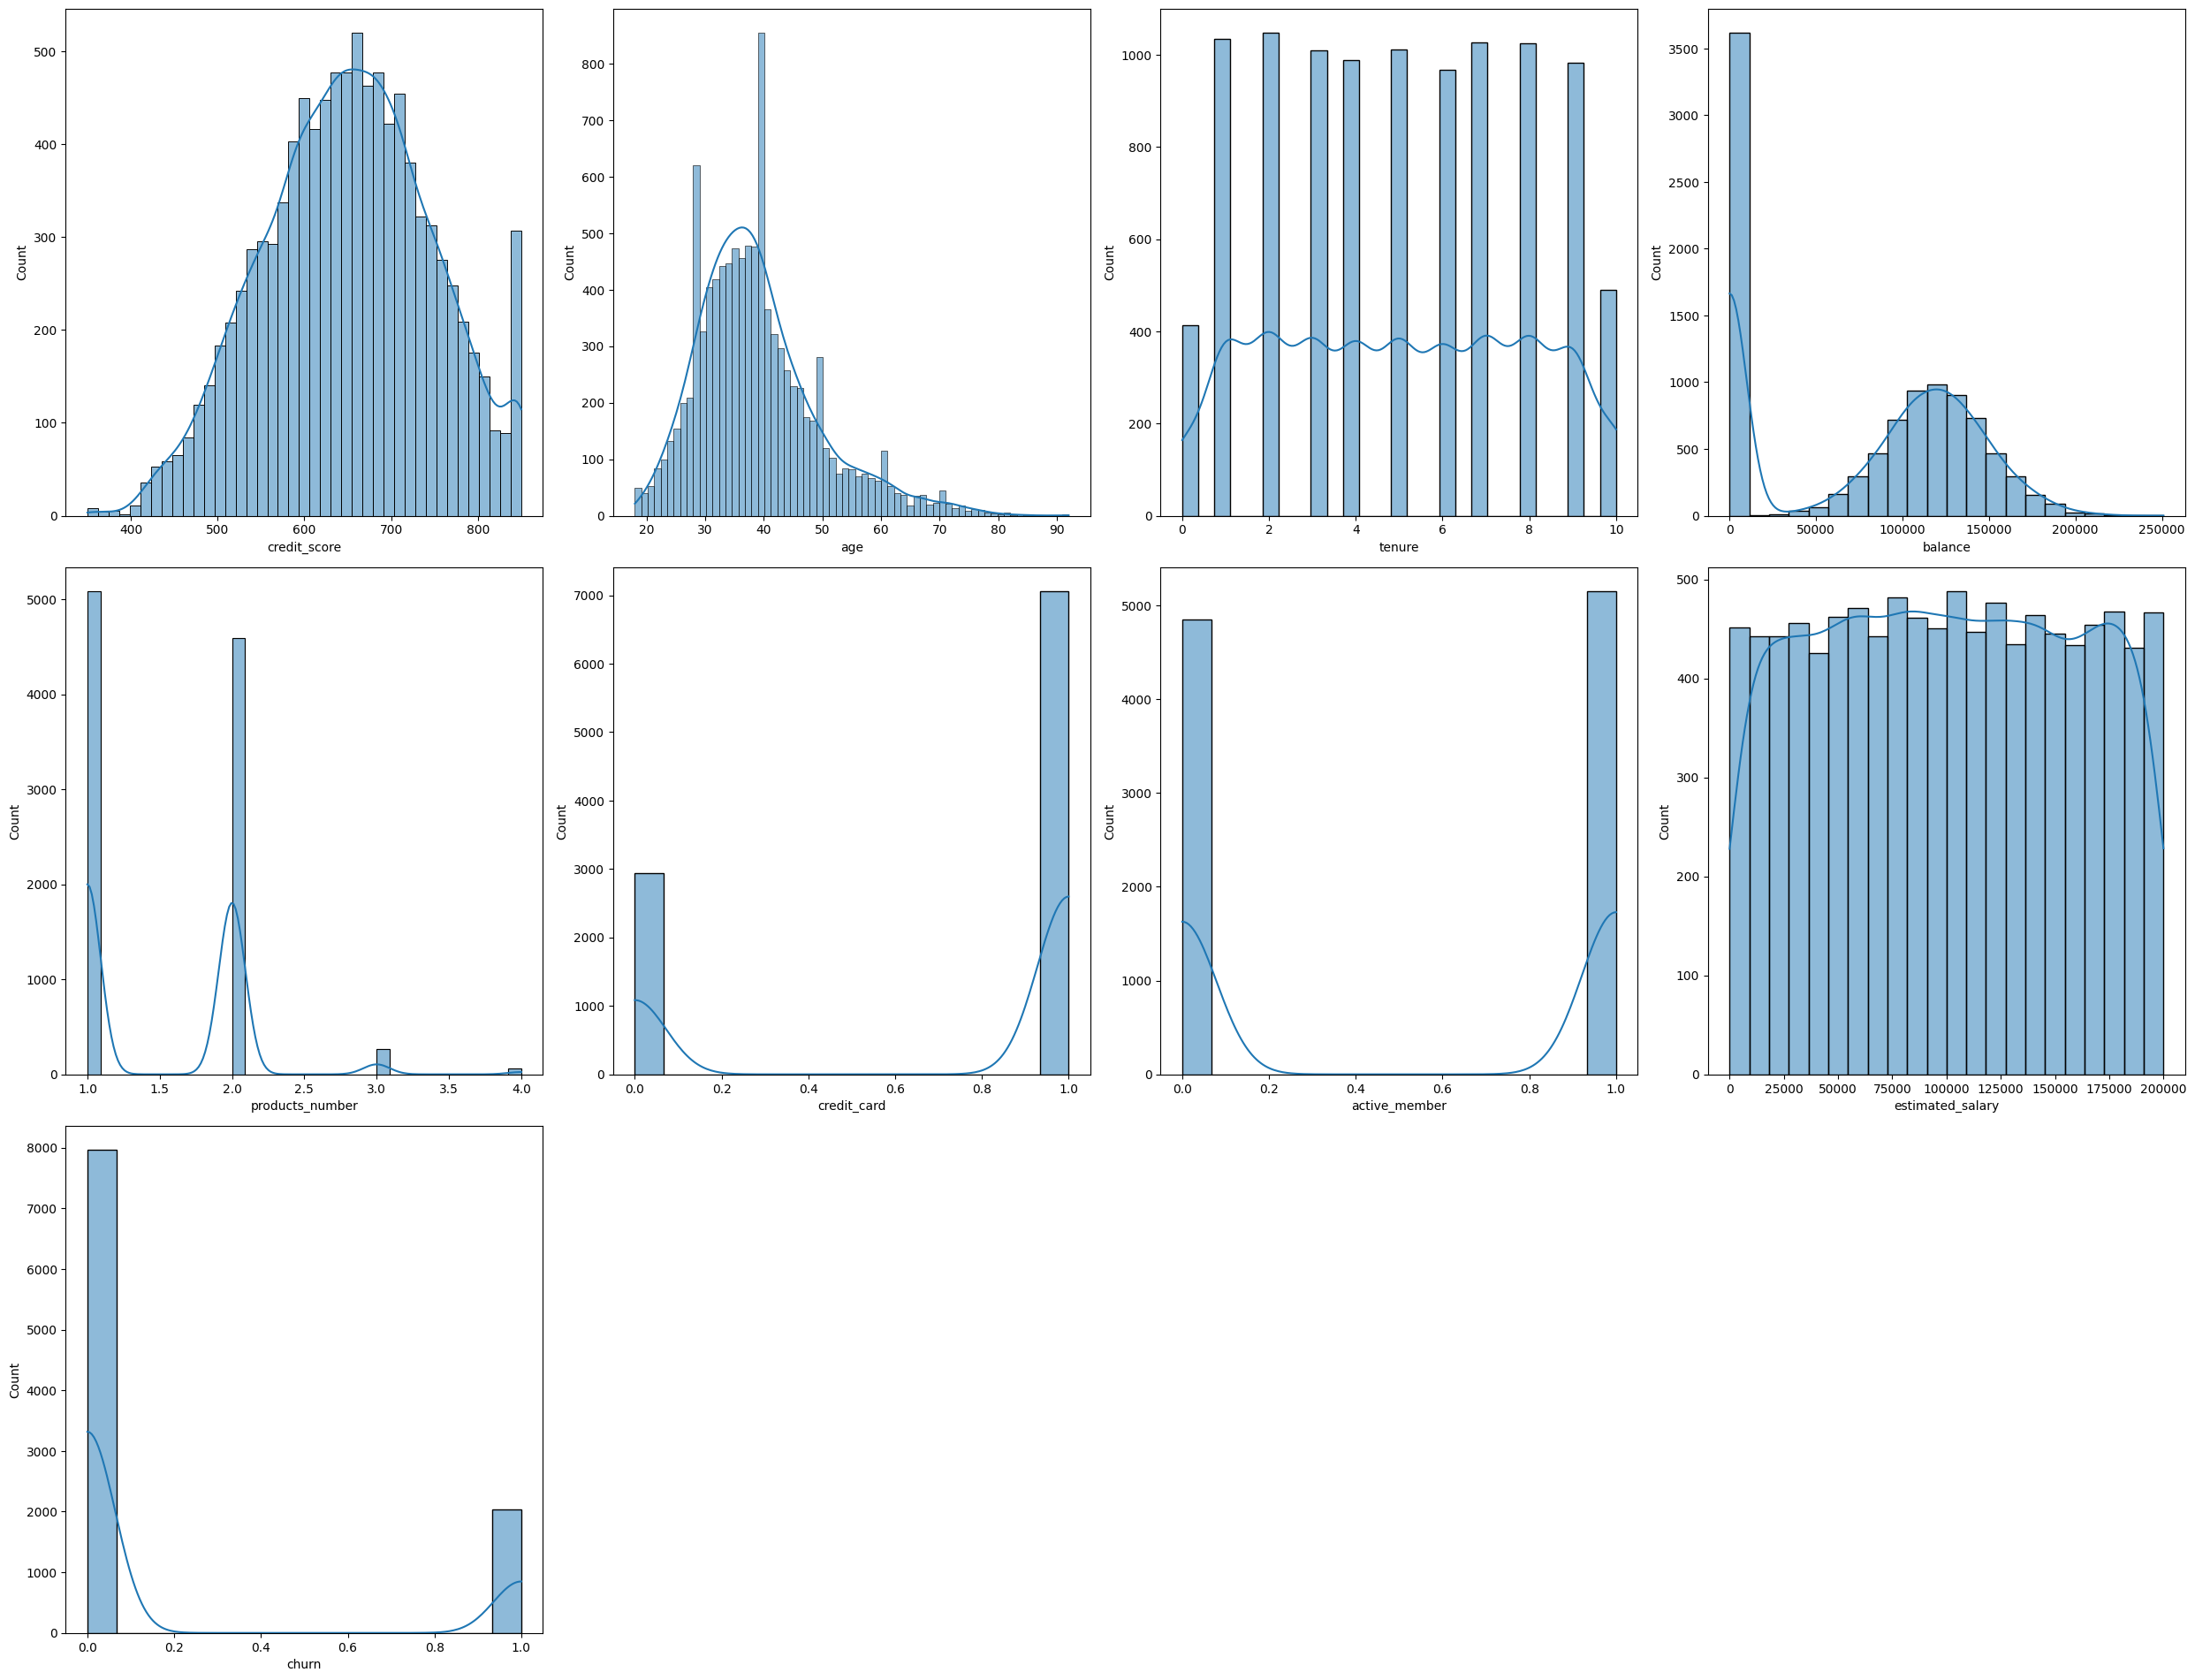

In [12]:
rows = 4
cols = 4
counter = 1
plt.rcParams['figure.figsize'] = [25,25]
for row in range(rows):
    for col in range(cols):
        if counter <= len(num_cols):
            plt.subplot(rows, cols, counter)
            sns.histplot(df[num_cols[counter - 1]], kde=True)
        counter += 1
plt.tight_layout()
plt.show()

# Categorical Column Distribution

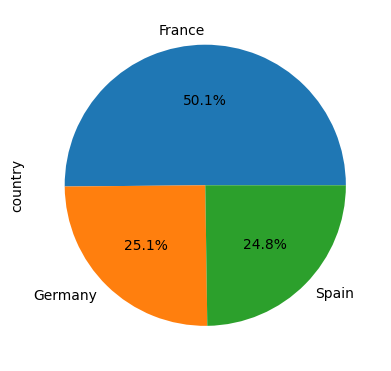

In [13]:
#country distribution
df['country'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.tight_layout()
plt.show()

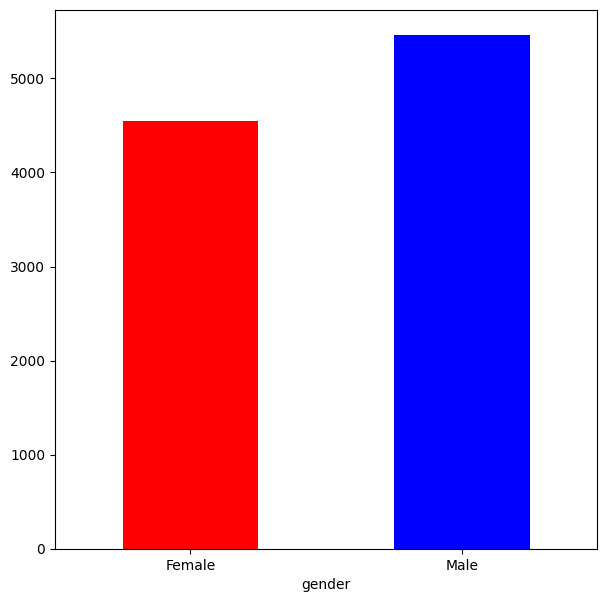

In [14]:
#gender distribution
plt.figure(figsize = (7,7))
plt_room_types = df.groupby("gender").size().plot.bar(x="gender", y= 'size', rot = 0, color=['red', 'blue'])

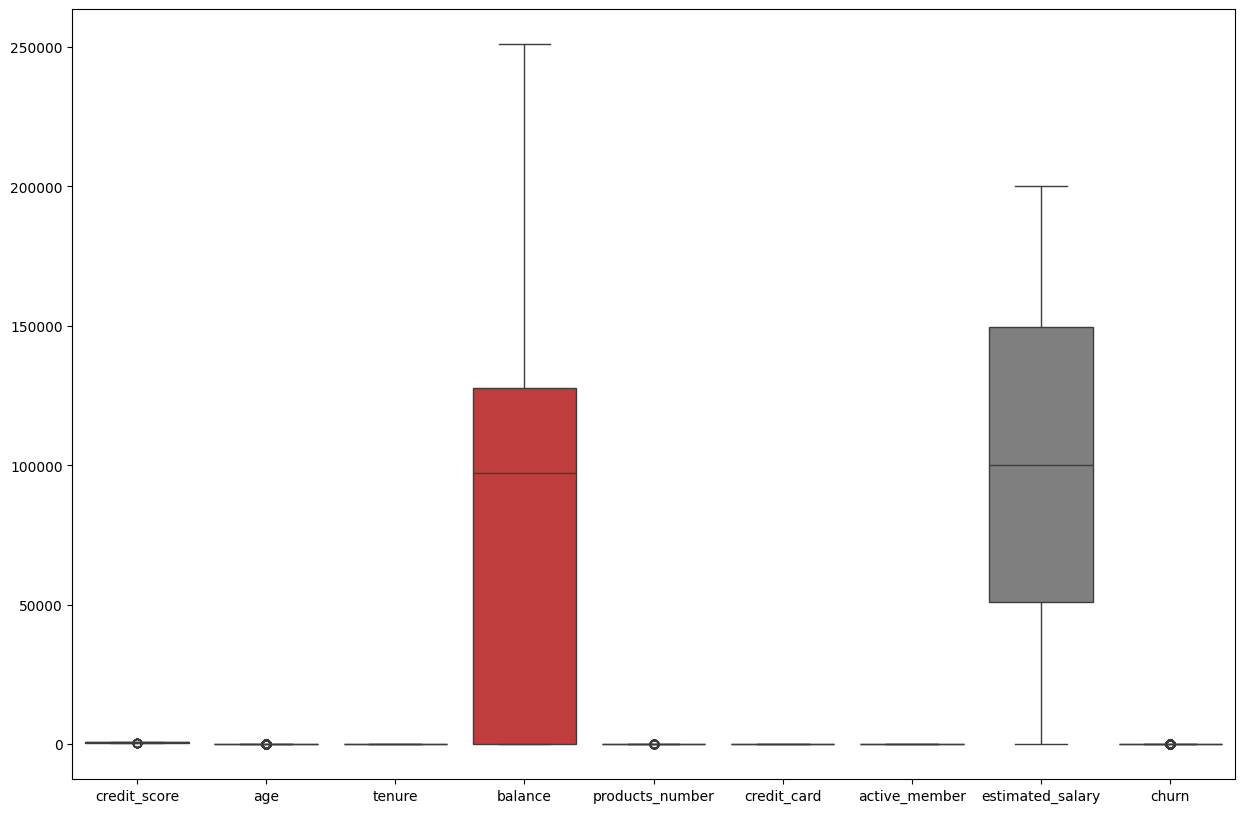

In [15]:
#displaying ranges of the independent variable and the target variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

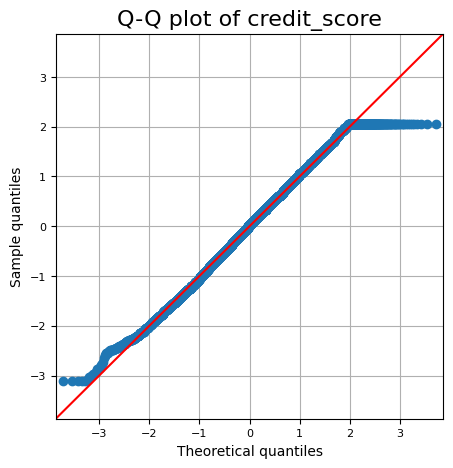

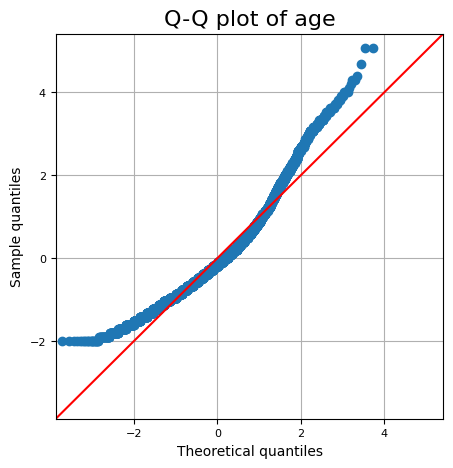

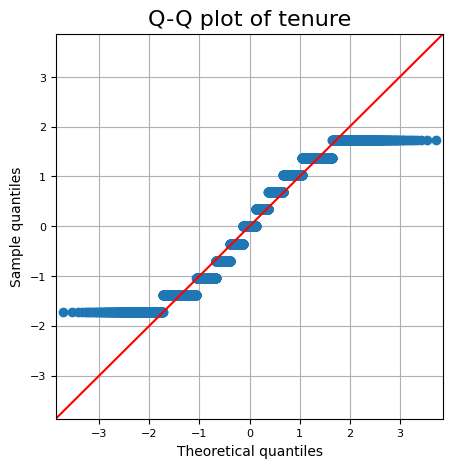

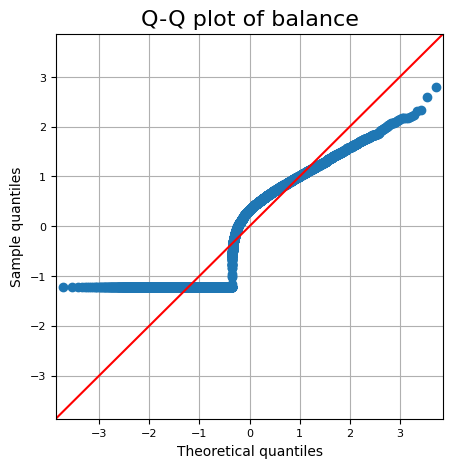

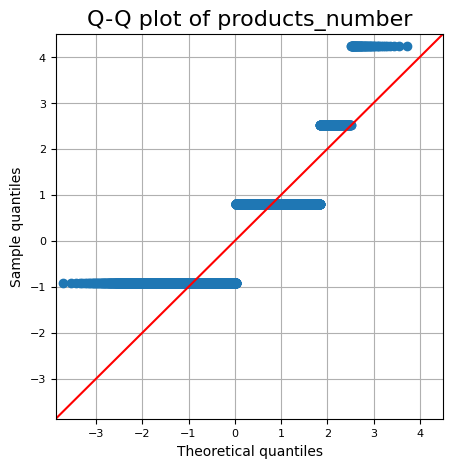

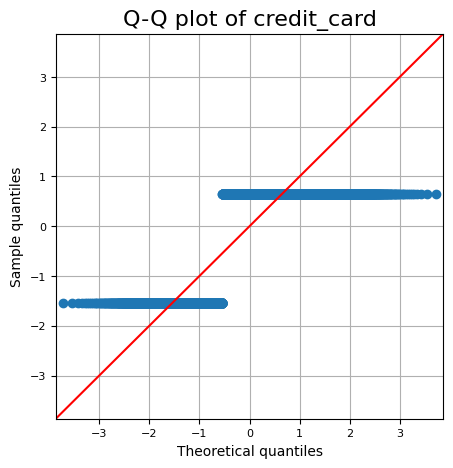

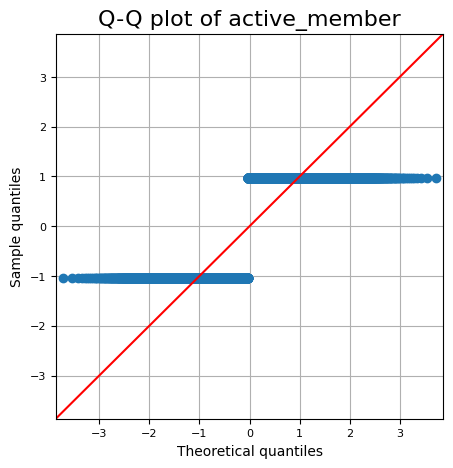

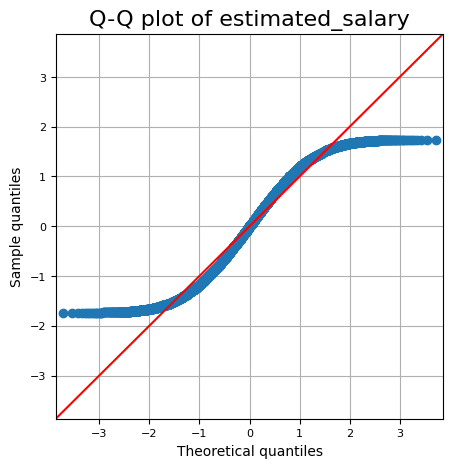

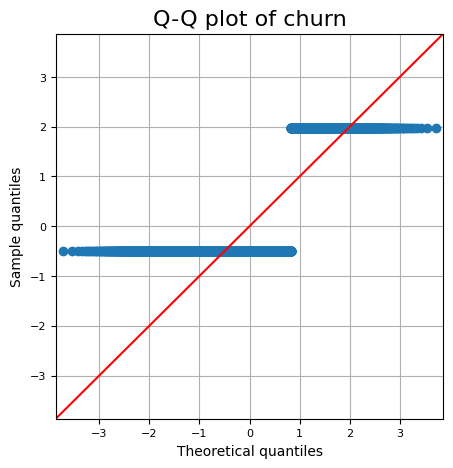

In [16]:
#displaying distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = df[num_cols]
plt.rc("figure", figsize=(5, 5))
for c in data_norm.columns[:]:
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel("Theoretical quantiles", fontsize=10)
    plt.ylabel("Sample quantiles", fontsize=10)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

# Encoding Categorical Features

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
onehot_col = ['country','gender']
onehot_prefix = ['cntry','gender']
df = pd.get_dummies(df, columns=onehot_col, prefix = onehot_prefix)
for col in catg_cols:
  if col not in onehot_col:
    df[col] = LabelEncoder().fit_transform(df[col])

# df2 = pd.get_dummies(df, columns=['country','gender'])
# df.head()

In [19]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


**Plotting Column Distribution**

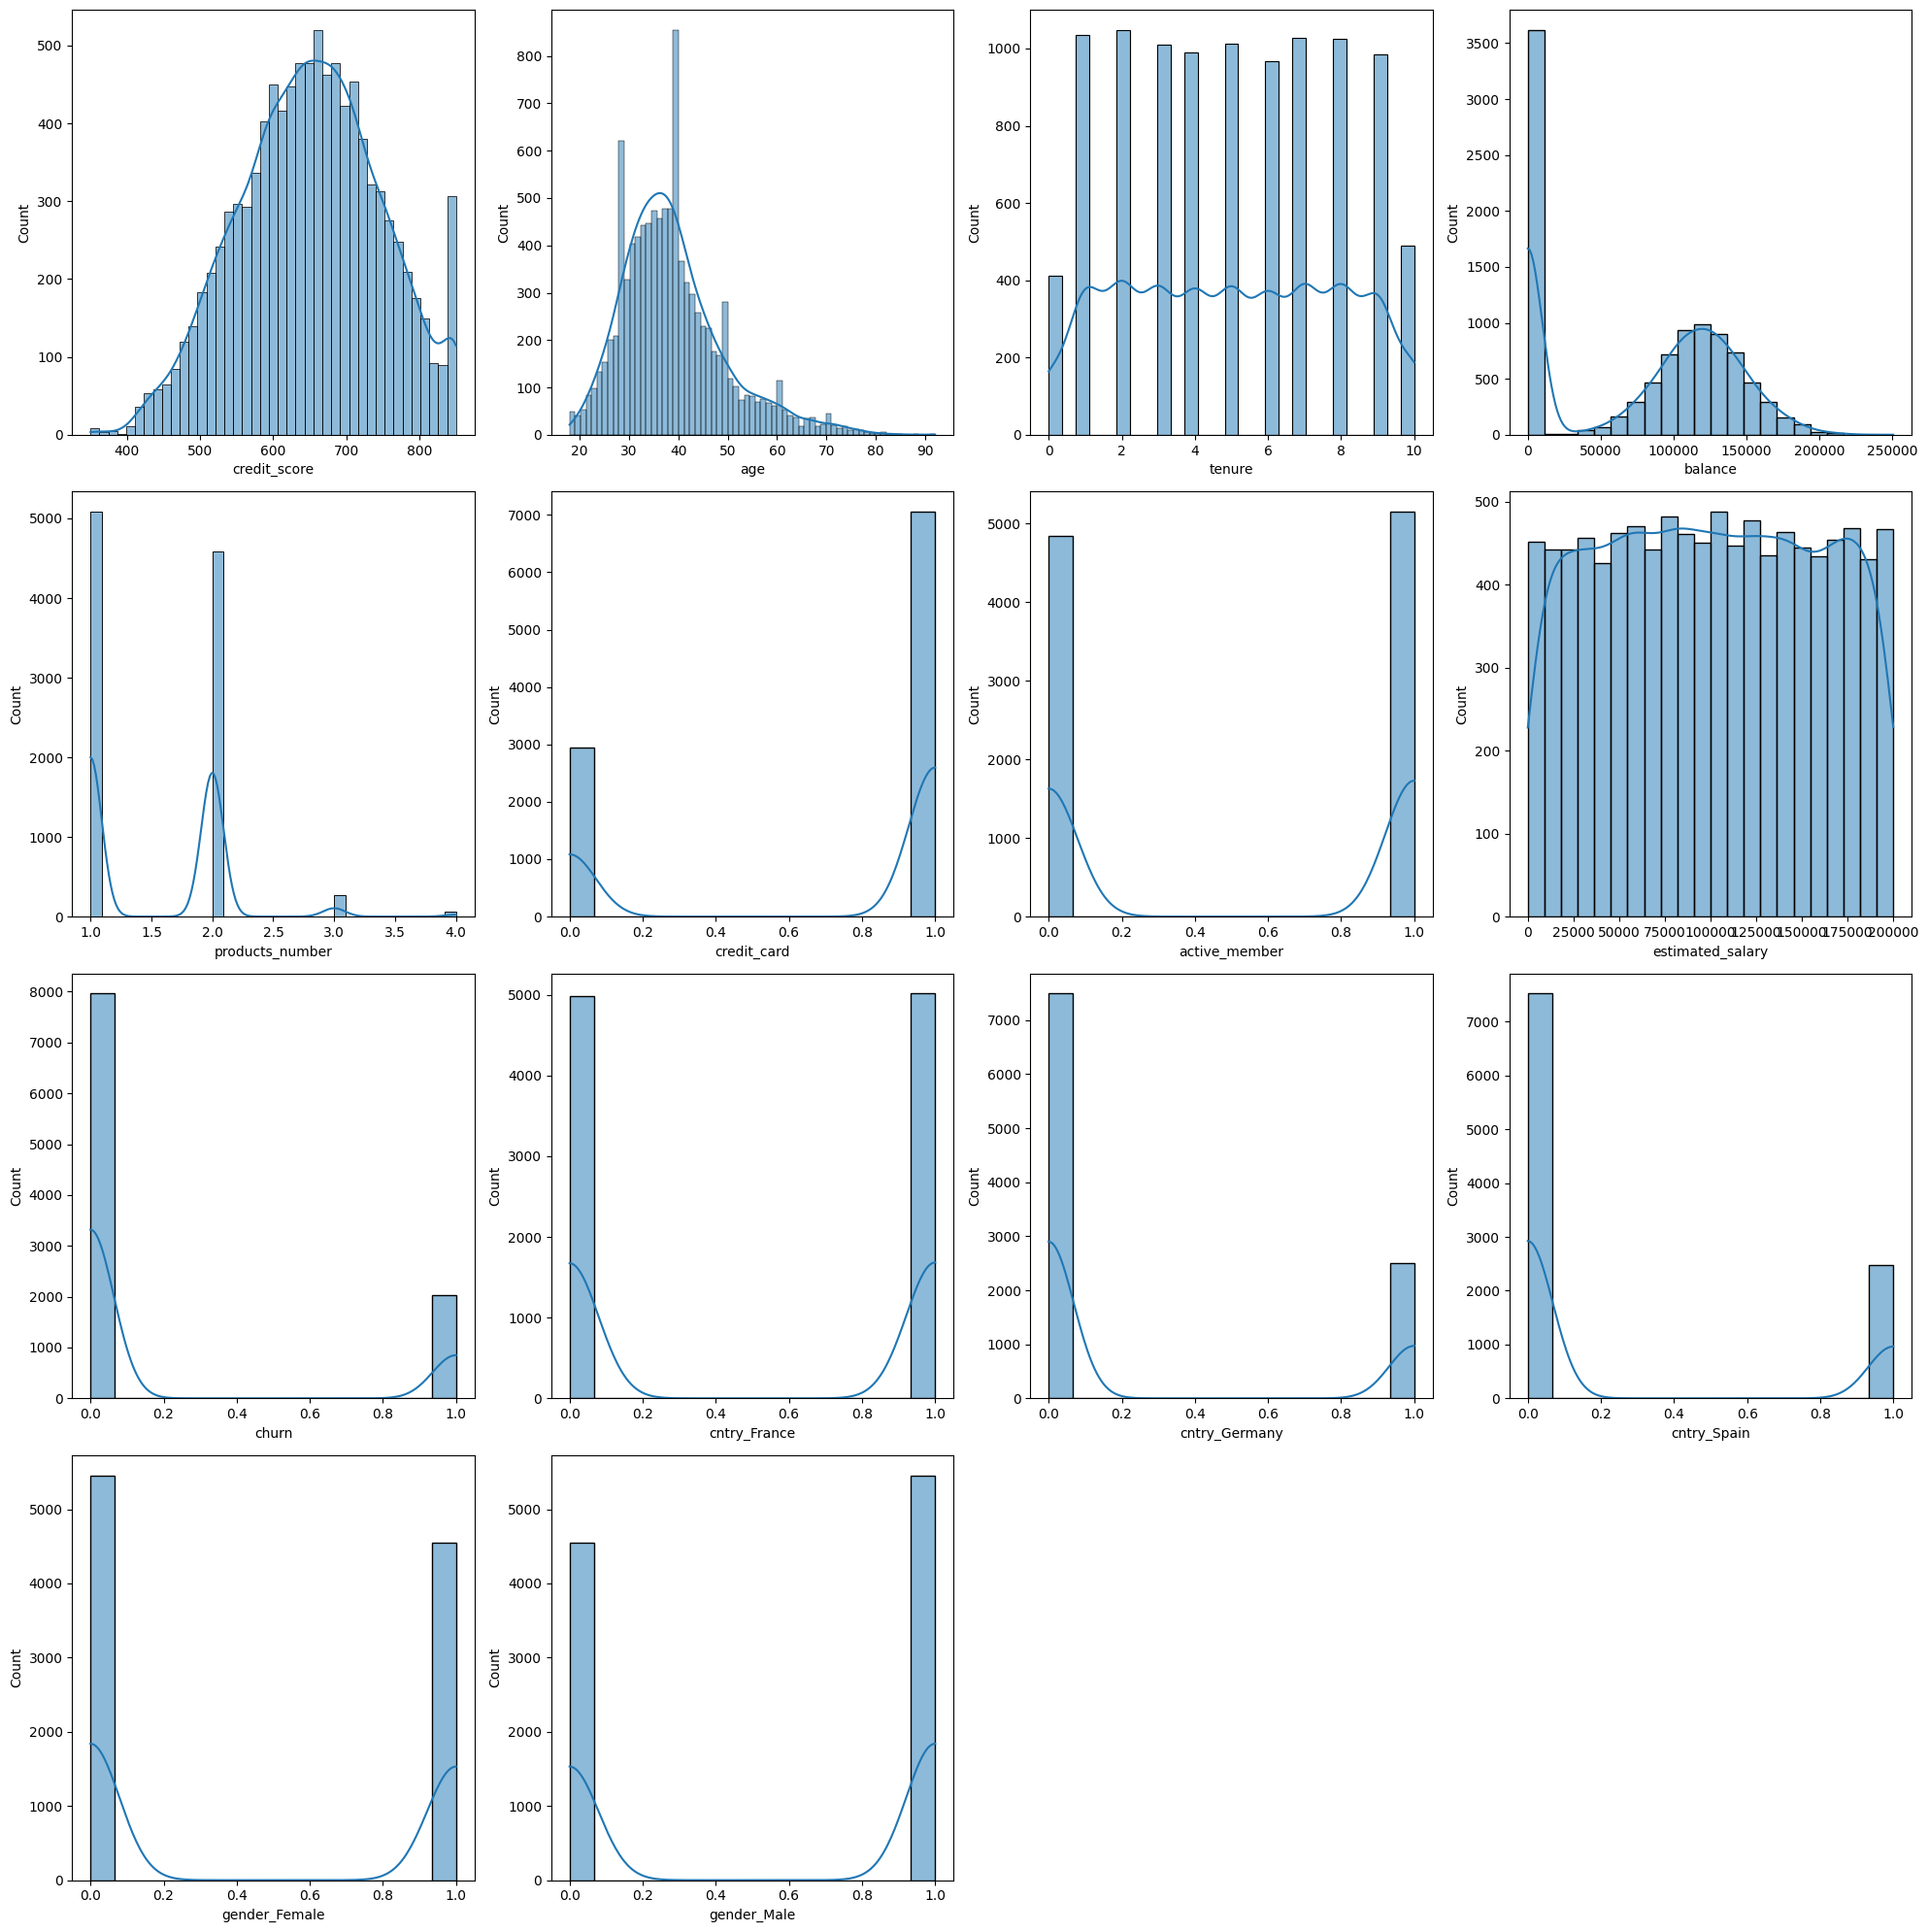

In [20]:
#plotting column distribution after encoding
cols=4
rows=((len(df.columns)-1) // cols)+1
counter=1
plt.rcParams['figure.figsize']=[5*cols, 5*rows]
for col in df.columns:
    plt.subplot(rows, cols, counter)
    sns.histplot(df[col], kde=True);
    counter+=1
plt.tight_layout()
plt.show()

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

# Correlation Matrix

<Axes: >

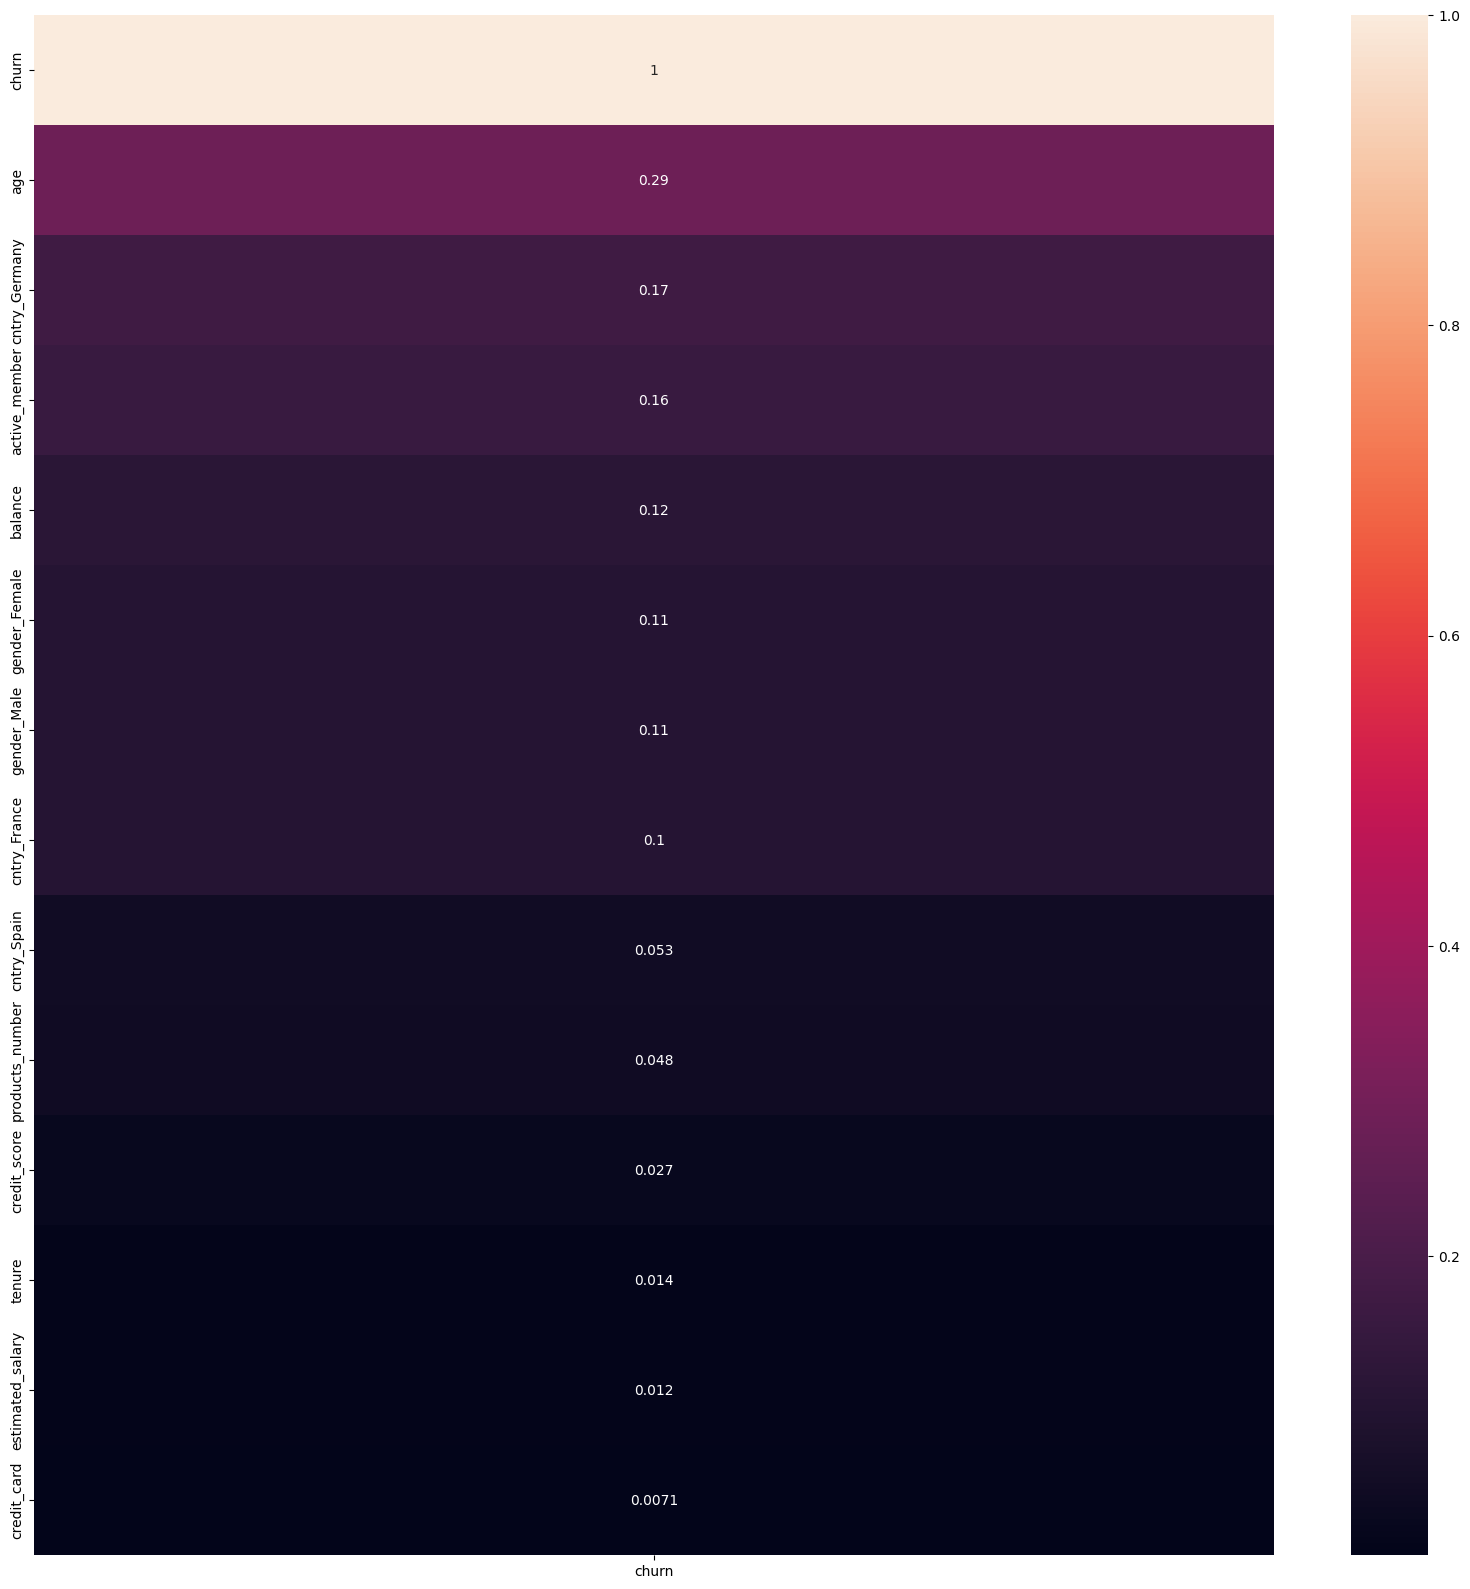

In [21]:
corr=df.corr()["churn"]
corr=corr.abs().sort_values(ascending=False)
sns.heatmap(data=corr.to_frame(),annot=True)

The most important variables are listed at the top of the heatmap, based on the absolute value of their correlation coefficient. In this case, the top variables are:

cntry_Germany (0.17)

gender_Female (0.6)

churn (0.54)

age (0.29)

cntry_France (0.1)

active_member (0.16)

# Correlation Heatmap

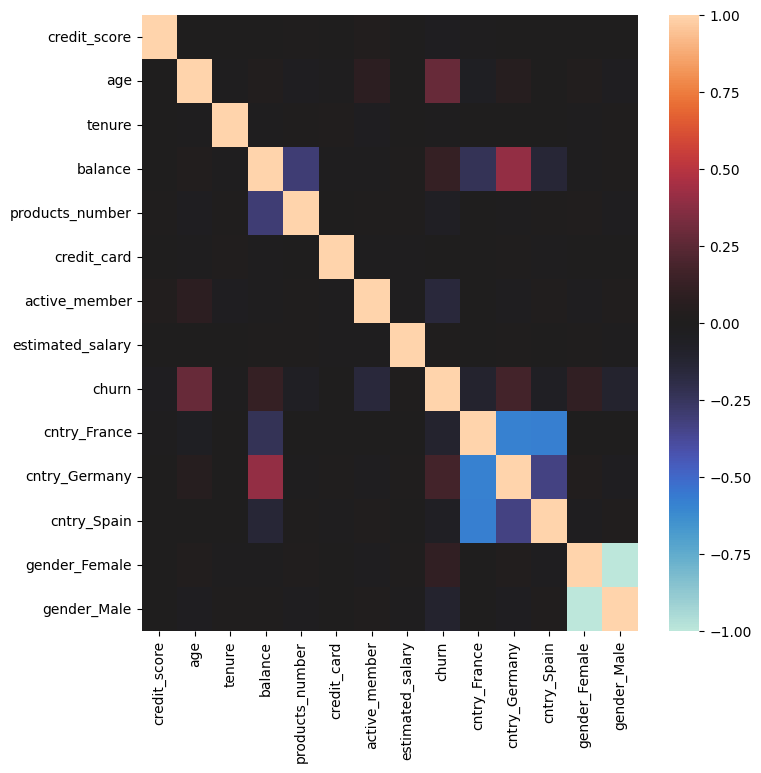

In [22]:
plt.rcParams['figure.figsize']=[8, 8]
sns.heatmap(df.corr(), fmt = '.1g', vmin = -1, vmax = 1, center = 0);

# Column Ranking Based on Correlation

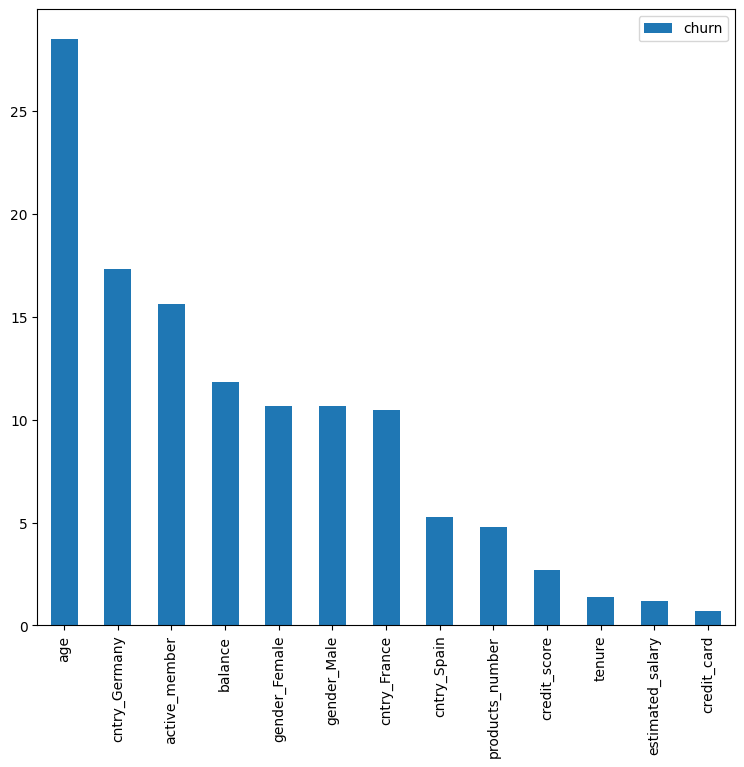

In [23]:
pd.DataFrame(abs(df.corr()['churn'].drop(['churn'])*100).sort_values(ascending=False)).plot.bar(figsize = (9,8));

# Pair Plot

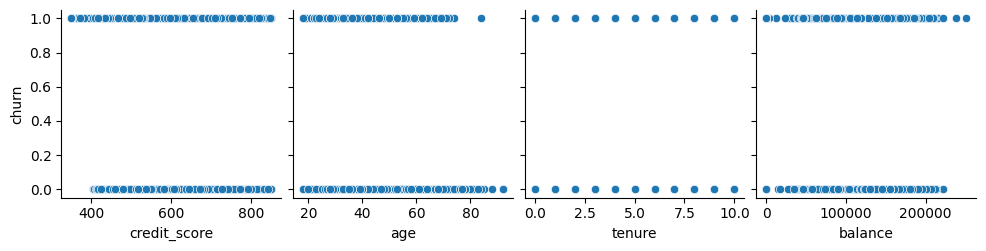

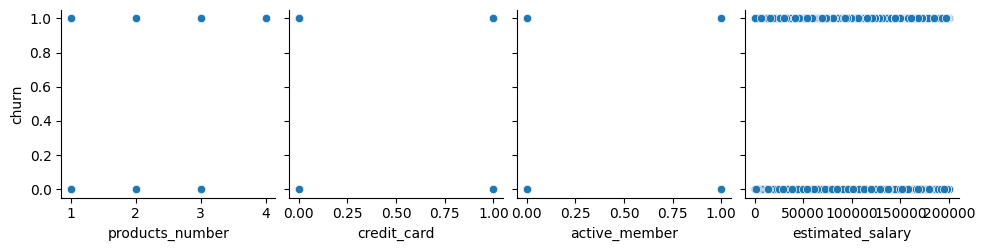

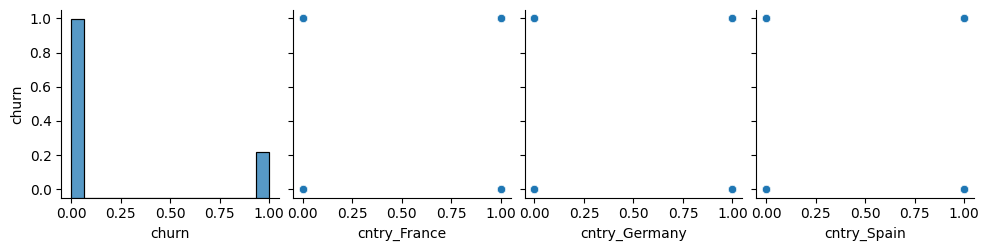

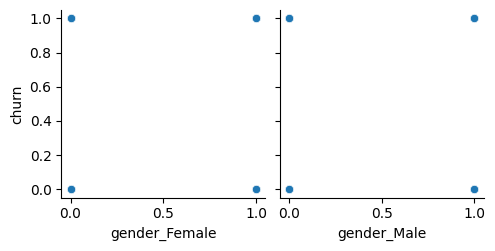

In [24]:
x_cols = df.columns
fig_per_row = 4
for i in range(0,len(x_cols), fig_per_row):
  sns.pairplot(data=df, y_vars=['churn'], x_vars=x_cols[i:i+fig_per_row]);

# OLS Regression Method

In [25]:
import statsmodels.api as sm

model = sm.OLS(df['churn'],df.loc[:,df.columns!= 'churn'],).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:04:32   Log-Likelihood:                -4277.7
No. Observations:               10000   AIC:                             8579.
Df Residuals:                    9988   BIC:                             8666.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score     -9.386e-05   3.84e-05     -2.441      0.015      -0.000   -1.85e-05
age                  0.0111      0.000     31.165      0.000       0.010       0.012
tenure              -0.0019      0.001     -1.483      0.138      -0.004       0.001
balance           3.139e-07   6.88e-08      4.562      0.000    1.79e-07    4.49e-07
products_number     -0.0158      0.007     -2.331      0.020      -0.029      -0.003
credit_card         -0.0049      0.008     -0.606      0.544      -0.021       0.011
active_member       -0.1411      0.007    -18.891      0.000      -0.156      -0.126
estimated_salary   6.85e-08   6.46e-08      1.060      0.289   -5.81e-08    1.95e-07
cntry_France        -0.0731      0.014     -5.296      0.000      -0.100      -0.046
cntry_Germany        0.0531      0.016      3.384      0.001       0.022       0.084
cntry_Spain         -0.0691      0.015     -4.760      0.000      -0.097      -0.041
gender_Female       -0.0072      0.021     -0.351      0.725      -0.048       0.033
gender_Male         -0.0818      0.020     -3.995      0.000      -0.122      -0.042
==============================================================================
Omnibus:                     1478.209   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2239.725
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       3.216   Cond. No.                     1.00e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Considering the significance value of 0.05 because accuracy in predicting the churn of the customer is not that critical

Credit_score has p-value 0.015, which is less and hence it is a significant feature.

Age has p-value 0, which is less and hence it is a significant feature.

Tenure has p-value 0.0138, which is higher and hence it is a non significant feature.

Products_number has p-value 0.020, which is less and hence it is a significant feature.

Credit_card has p-value 0.544, which is higher and hence it is a non significant feature.

Active member has p-value 0, which is less and hence it is a significant feature.

Estimated_salary has p-value 0.289 , which is higher and hence it is a non significant feature.

Cntry_France has p-value 0, which is less and hence it is a significant feature.

Cntry_Germany has p-value 0, which is less and hence it is a significant feature.

Cntry_Spain has p-value 0, which is less and hence it is a significant feature.

Gender_female has p-value 0.725, which is higher and hence it is a non significant feature.

Gender_male has p-value 0, which is less and hence it is a significant feature.

# Which independent variables have missing data? How much?

In [26]:
percent_missing = df.isnull().sum() * 100 / len(df)

missing_value_df = pd.DataFrame({'variable_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,variable_name,percent_missing
credit_score,credit_score,0.0
age,age,0.0
tenure,tenure,0.0
balance,balance,0.0
products_number,products_number,0.0
credit_card,credit_card,0.0
active_member,active_member,0.0
estimated_salary,estimated_salary,0.0
churn,churn,0.0
cntry_France,cntry_France,0.0


As seen above, there are no variables with missing values

#Do the training and test sets have the same data?

In [27]:
from sklearn.model_selection import train_test_split

copy_df = df.copy()
X = copy_df.drop(['churn'],axis=1).copy()
y = copy_df['churn'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1


In [29]:
X_test.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,0,1,0,0,1
4684,623,43,1,0.00,2,1,1,146379.30,1,0,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,0,1,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,0,1,0,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,0,1,1,0


Distribution of training and testing data

In [30]:
X_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.499250,0.251375,0.249375,0.454750,0.545250
std,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.500031,0.433831,0.432678,0.497979,0.497979
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X_test.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,646.053500,39.018000,5.048500,78020.88786,1.525500,0.713500,0.524500,98726.040350,0.510000,0.249000,0.241000,0.452500,0.547500
std,97.689463,10.364332,2.933675,62134.21718,0.589511,0.452239,0.499524,57470.903307,0.500025,0.432542,0.427797,0.497863,0.497863
min,350.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,578.000000,32.000000,2.000000,0.00000,1.000000,0.000000,0.000000,49712.365000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,646.500000,38.000000,5.000000,99796.46000,1.000000,1.000000,1.000000,98511.730000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,712.250000,44.000000,8.000000,127872.15250,2.000000,1.000000,1.000000,147317.217500,1.000000,0.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,216109.88000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


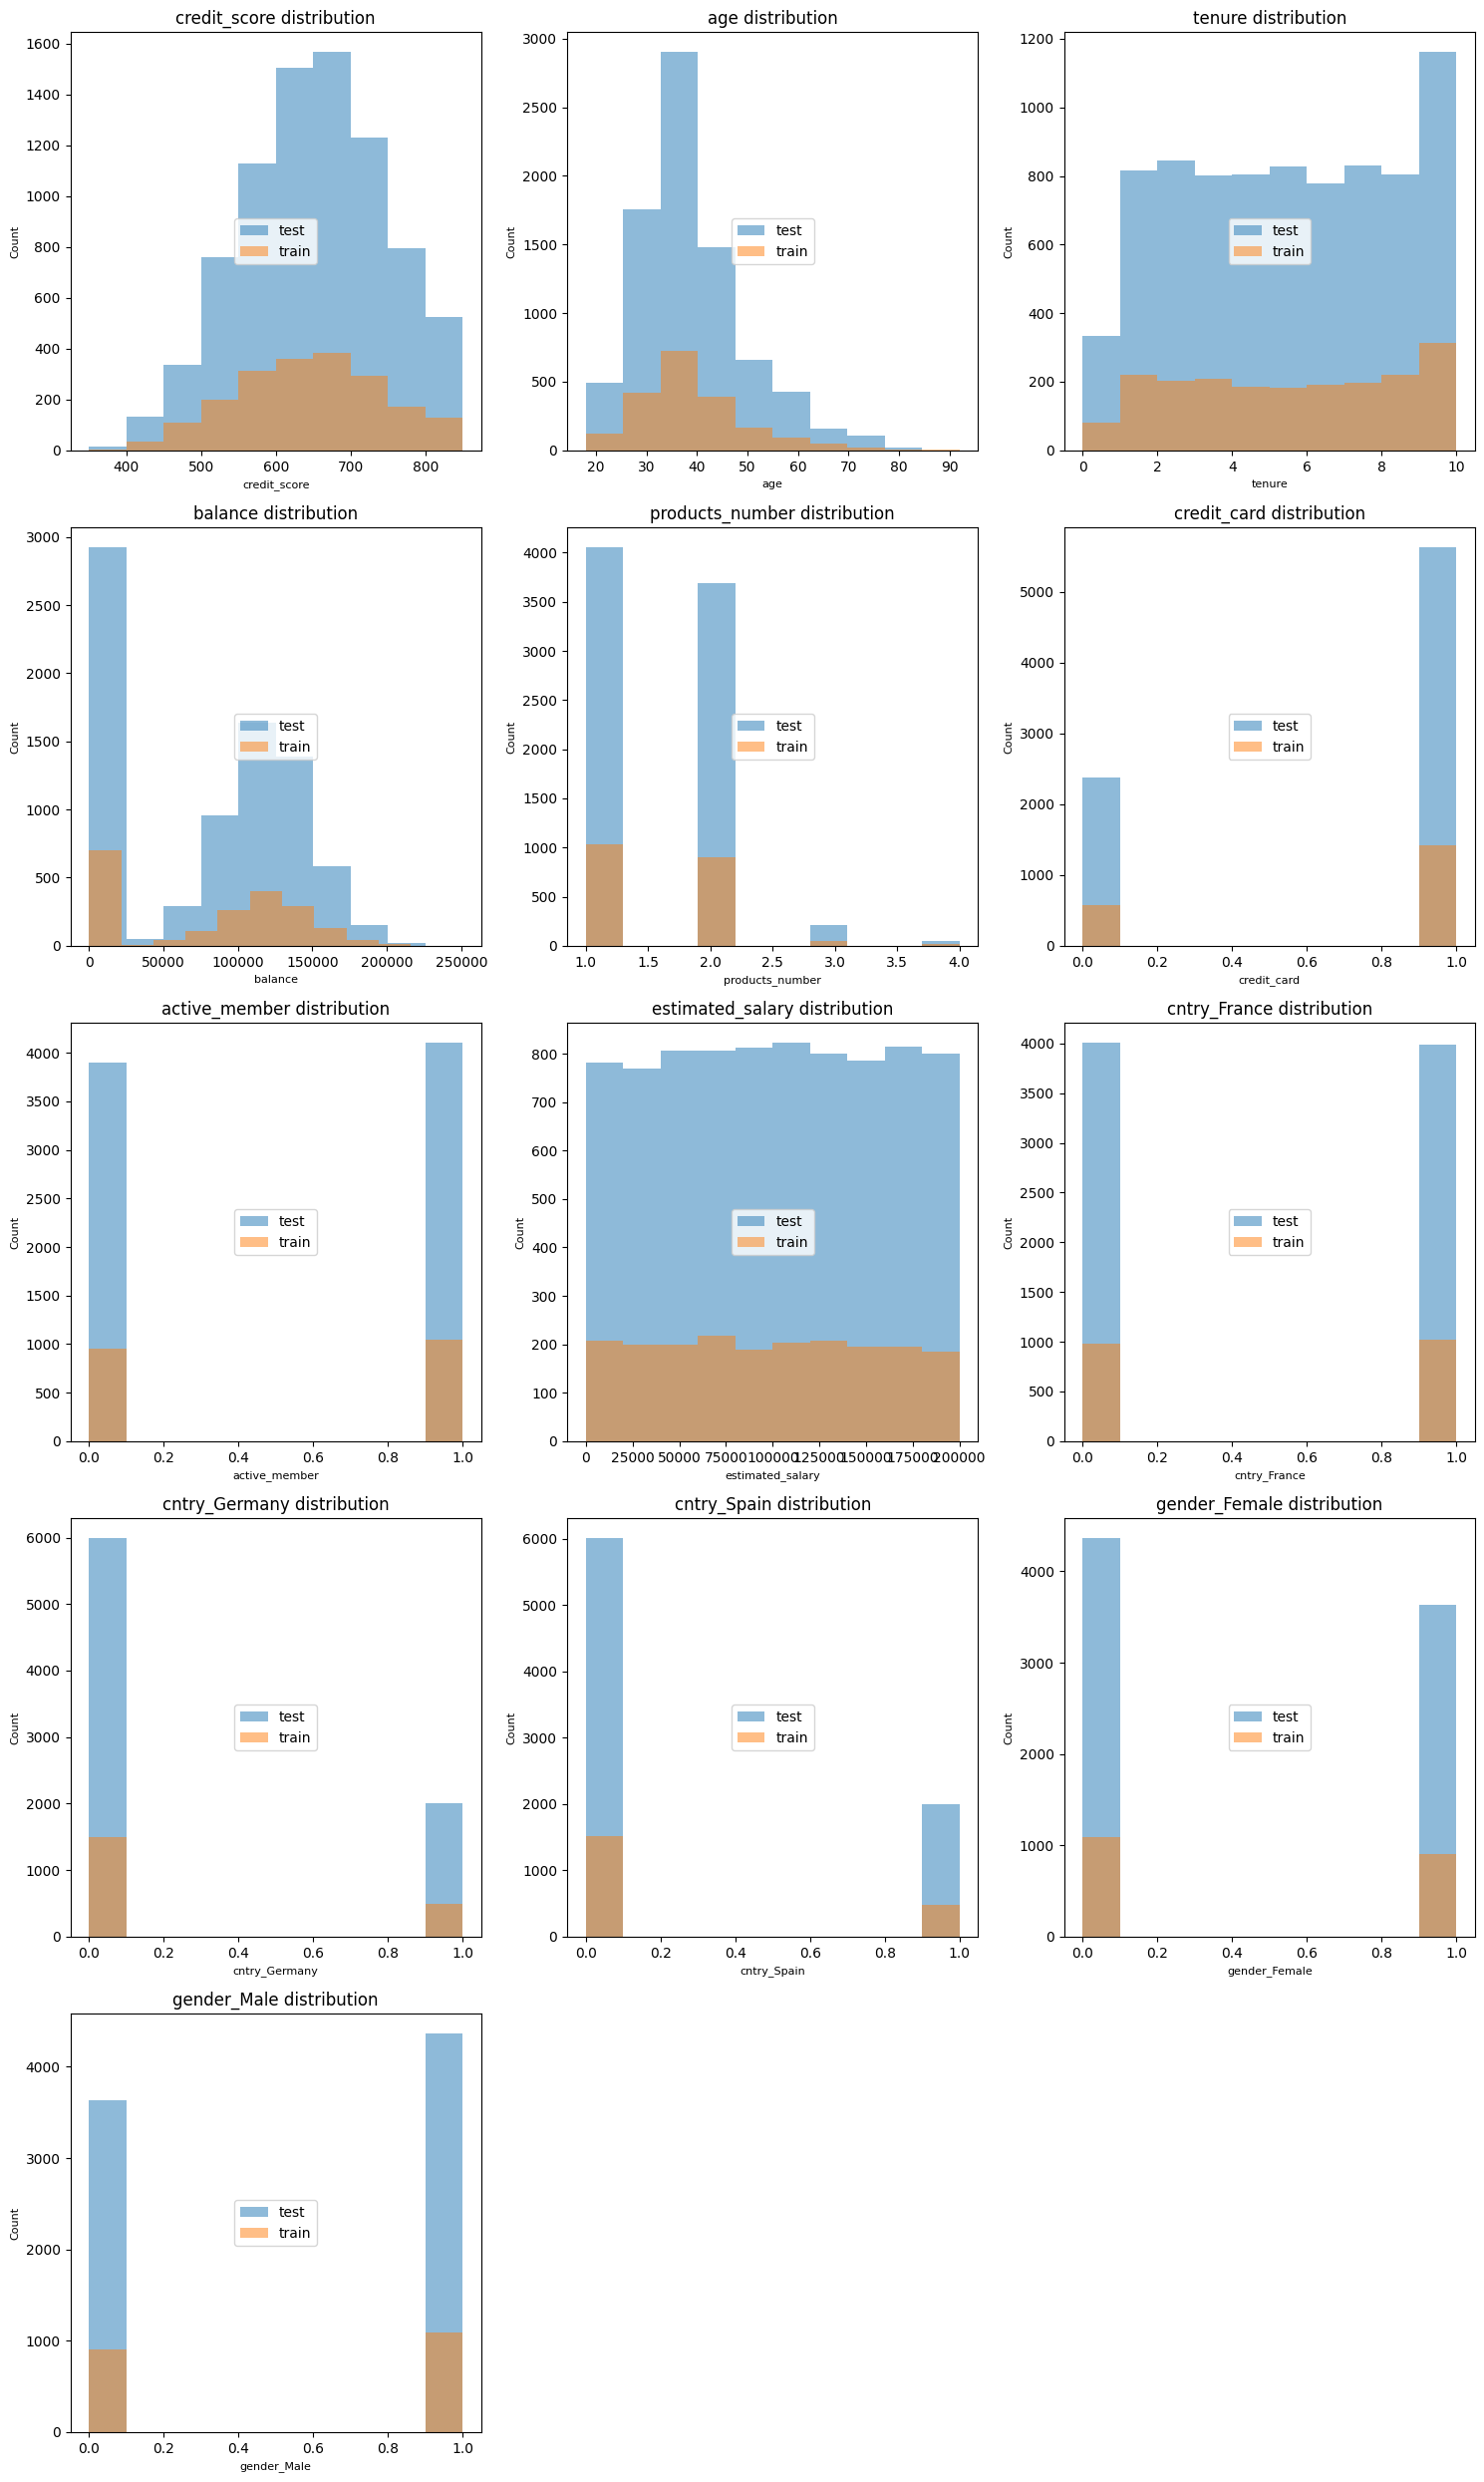

In [32]:
#plotting training and testing data distribution
cols=3
rows=((len(X_train.columns)-1) // cols)+1
counter=1
plt.rcParams['figure.figsize']=[5*cols, 5*rows]
for c in X_train.columns[:]:
    plt.subplot(rows, cols, counter)
    plt.hist(X_train[c], alpha=0.5, label="test")
    plt.hist(X_test[c], alpha=0.5, label="train")
    plt.xlabel(c, size=8)
    plt.ylabel("Count", size=8)
    plt.legend(loc="center")
    plt.title("{} distribution".format(c), size=12)
    counter+=1
plt.tight_layout()
plt.show()

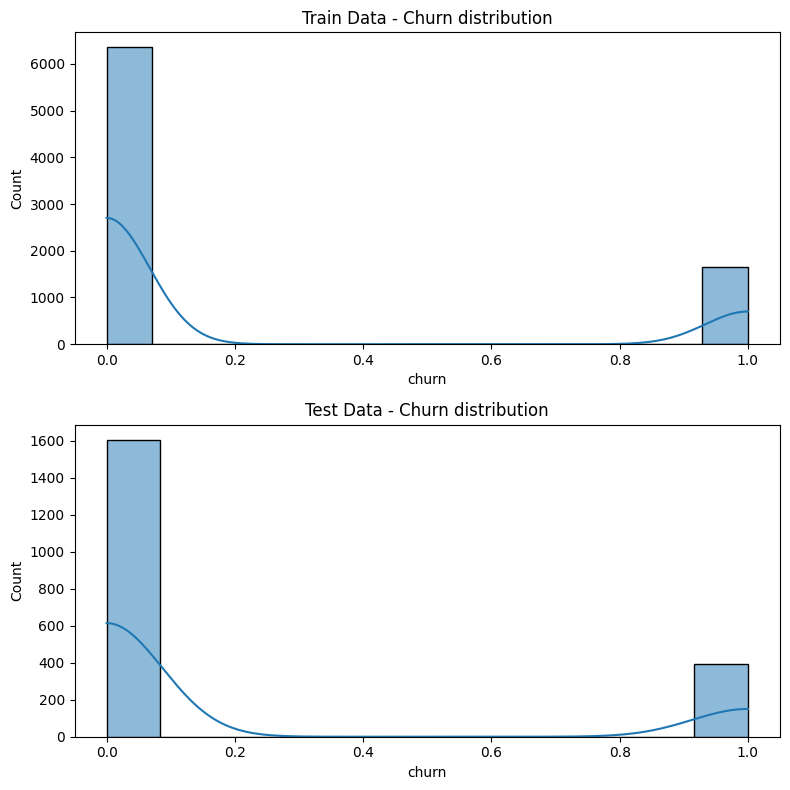

In [33]:
#plotting distribution of churn
plt.rcParams['figure.figsize']=[8, 8]
plt.subplot(2, 1, 1)
sns.histplot(y_train, kde=True);
plt.title("Train Data - Churn distribution")
plt.subplot(2, 1, 2)
sns.histplot(y_test, kde=True);
plt.title("Test Data - Churn distribution")


plt.tight_layout()
plt.show()

From the above graphs, we can observe that there is similar distribution between the training and testing data

#  In the predictor variables independent of all the other predictor variables?

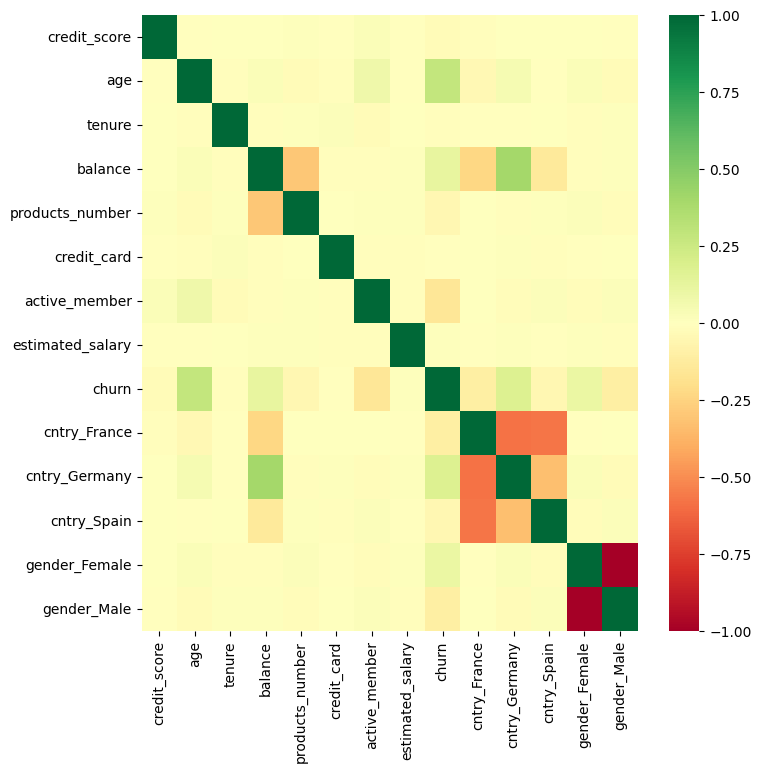

In [34]:
sns.heatmap(df.corr(), fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'RdYlGn');

# Which predictor variables are the most important?

In [35]:
round(abs(df.corr()['churn'].drop('churn')*100).sort_values(ascending=False), 2)

age                 28.53
cntry_Germany       17.35
active_member       15.61
balance             11.85
gender_Female       10.65
gender_Male         10.65
cntry_France        10.50
cntry_Spain          5.27
products_number      4.78
credit_score         2.71
tenure               1.40
estimated_salary     1.21
credit_card          0.71
Name: churn, dtype: float64

# Model Building

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Logistic Regression

In [37]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)

lg_predict = my_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test,lg_predict)

print("training data score: {:,.3%}".format(my_logreg.score(X_train, y_train)))
print("test data score: {:,.3%}".format(my_logreg.score(X_test, y_test)))
print("The accuracy is " ,"{:.1f}".format(accuracy_logreg*100), "%")


prob = my_logreg.predict_proba(X_test)


training data score: 78.763%
test data score: 80.050%
The accuracy is  80.0 %


In [38]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=ee3e8caf7ccec82de7422641e5102667a8bef9fd68b94b2e510104259dc9a73d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [39]:
import eli5
from eli5.sklearn import PermutationImportance

In [40]:
perm = PermutationImportance(my_logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0103 ± 0.0074,age
0.0059 ± 0.0047,credit_score
0.0037 ± 0.0035,balance
0.0033 ± 0.0020,estimated_salary
0.0004 ± 0.0004,cntry_France
0.0003 ± 0.0005,gender_Male
0.0003 ± 0.0005,gender_Female
0.0003 ± 0.0005,active_member
0.0003 ± 0.0005,products_number
0.0003 ± 0.0005,tenure


# Random Forest

In [41]:
my_rf = RandomForestClassifier()
my_rf.fit(X_train,y_train)

y_predict_rf = my_rf.predict(X_test)
print(y_predict_rf)

accuracy_rf = accuracy_score(y_test, y_predict_rf)


print("training data score: {:,.3%}".format(my_rf.score(X_train, y_train)))
print("test data score: {:,.3%}".format(my_rf.score(X_test, y_test)))
print("The accuracy is " ,"{:.1f}".format(accuracy_rf*100), "%")

[0 0 0 ... 1 0 0]
training data score: 99.987%
test data score: 86.350%
The accuracy is  86.4 %


In [42]:
perm = PermutationImportance(my_rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0538 ± 0.0031,products_number
0.0529 ± 0.0071,age
0.0271 ± 0.0128,active_member
0.0071 ± 0.0053,cntry_Germany
0.0055 ± 0.0081,balance
0.0014 ± 0.0035,credit_card
0.0012 ± 0.0055,tenure
0.0007 ± 0.0021,cntry_Spain
0.0004 ± 0.0026,credit_score
-0.0009 ± 0.0031,cntry_France


# Do the ranges of the predictor variables make sense?

In [43]:
desc = df.describe()
desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
for row in ['min', 'max', '25%', '50%', '75%']:
  desc.loc[row] = desc.loc[row].astype(int)
  for col in desc.columns:
    if col in onehot_col:
      mapping = onehot_col[col]
      desc.loc[row][col] = [key for key, val in mapping.items() if val == desc.loc[row][col]][0]
desc

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037,0.5014,0.2509,0.2477,0.4543,0.5457
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350,18,0,0,1,0,0,11,0,0,0,0,0,0
25%,584,32,3,0,1,0,0,51002,0,0,0,0,0,0
50%,652,37,5,97198,1,1,1,100193,0,1,0,0,0,1
75%,718,44,7,127644,2,1,1,149388,0,1,1,0,1,1
max,850,92,10,250898,4,1,1,199992,1,1,1,1,1,1


# What are the distributions of the predictor variables?

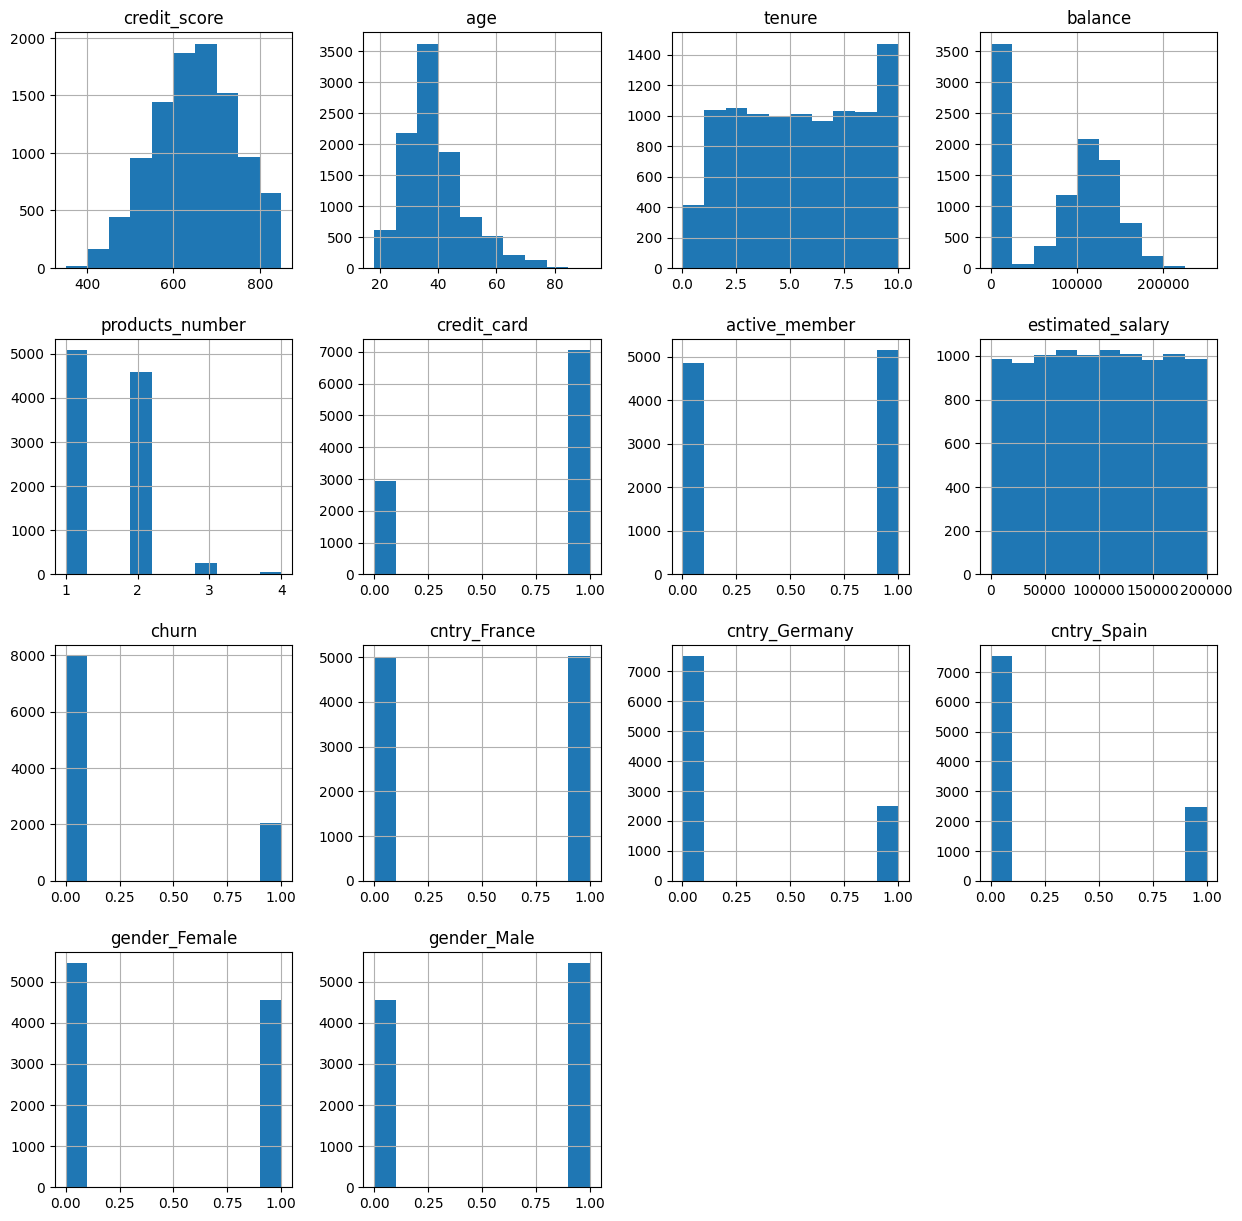

In [44]:
df.hist(figsize=(15,15));

#Remove outliers and keep outliers (does if have an effect of the final predictive model)?

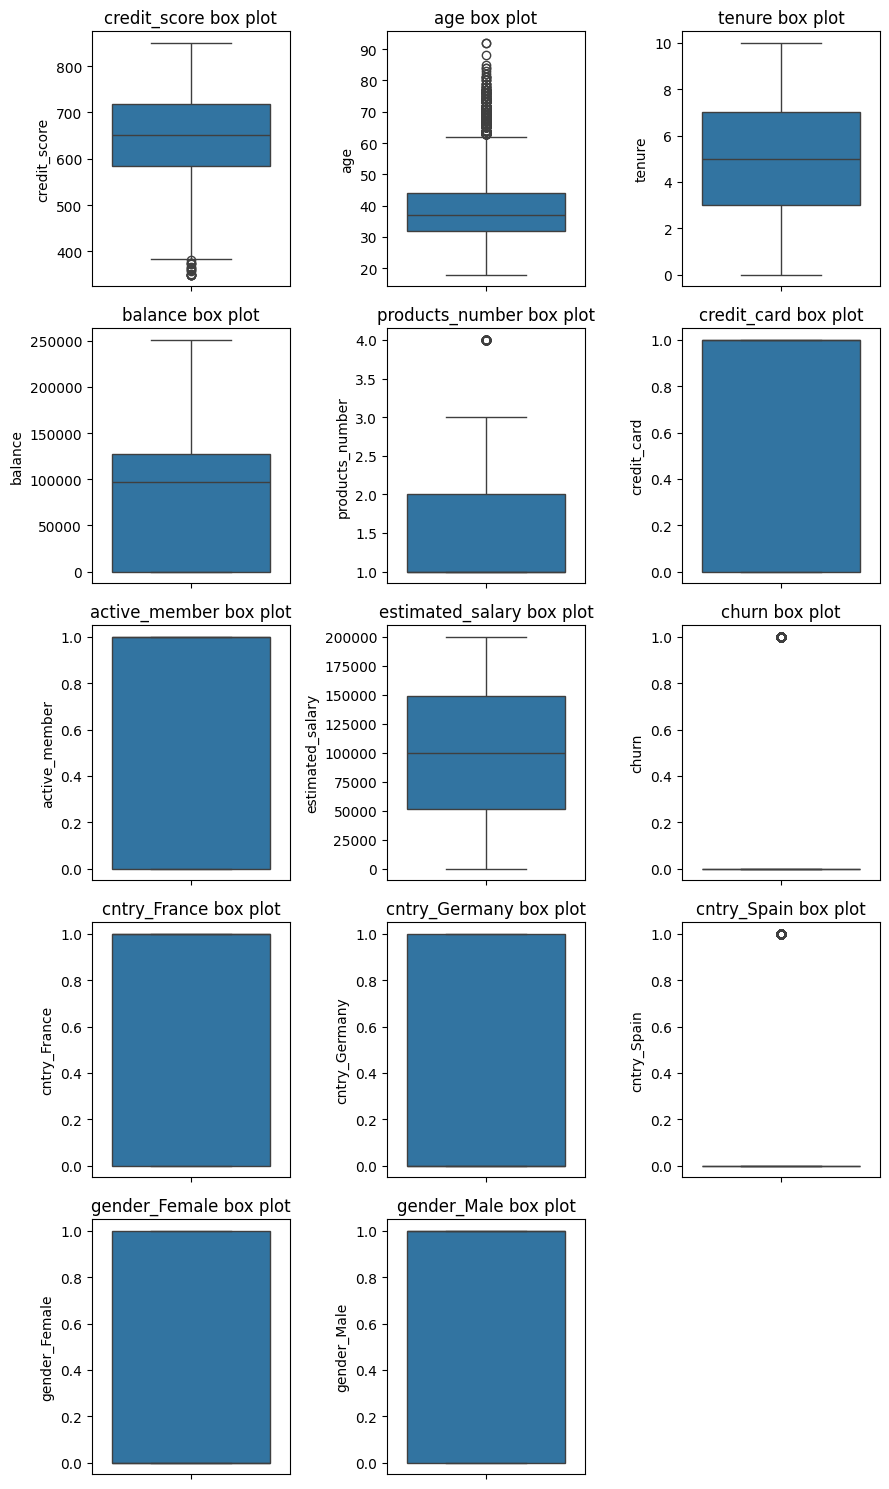

In [45]:
cols=3
rows=((len(df.columns)-1) // cols)+1
counter=1
plt.rcParams['figure.figsize']=[3*cols, 3*rows]
for c in df.columns:
    plt.subplot(rows, cols, counter)
    sns.boxplot(df[c])
    plt.title("{} box plot".format(c), size=12)
    counter+=1
plt.tight_layout()
plt.show()

In [46]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cntry_France,cntry_Germany,cntry_Spain,gender_Female,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

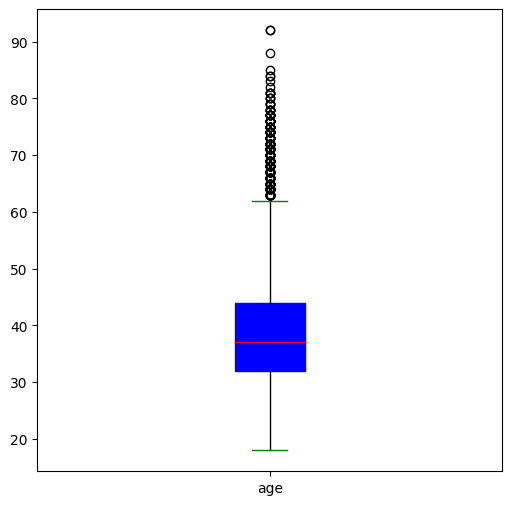

In [47]:
age=df['age']
plt.figure(figsize=(6,6))
props2= dict(boxes='blue',whiskers='black',medians='red',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [48]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR

    return lower_boundary,upper_boundary

In [49]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [50]:
def remove_outlier(df_in,feature):
    Q1=df_in[feature].quantile(.25)
    Q3=df_in[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    df_out=df_in.loc[(df_in[feature]>lower_boundary) & (df_in[feature]<upper_boundary)]

    return df_out

In [51]:
lower_age,upper_age=find_boundaries(df,'age')
print(lower_age,upper_age)

14.0 62.0


In [52]:
outliers = find_outliers_IQR(df['age'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 359


In [53]:
df= remove_outlier(df,'age')

<Axes: >

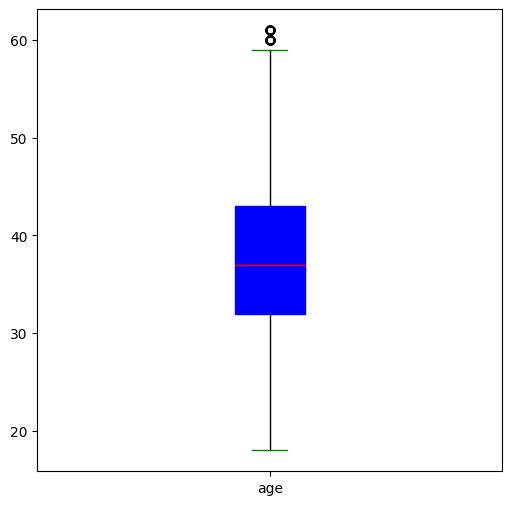

In [54]:
age=df['age']
plt.figure(figsize=(6,6))
props2= dict(boxes='blue',whiskers='black',medians='red',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

<Axes: >

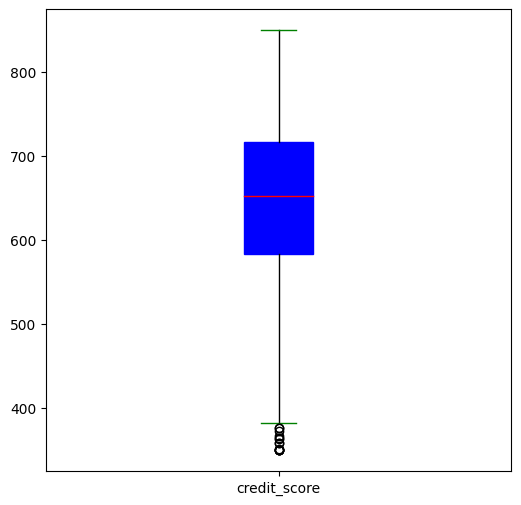

In [55]:
credit_score=df['credit_score']
plt.figure(figsize=(6,6))
props2= dict(boxes='blue',whiskers='black',medians='red',caps='green')
credit_score.plot.box(color=props2,patch_artist=True,vert=True)

In [56]:
lower_credit_score,upper_credit_score=find_boundaries(df,'credit_score')
print(lower_credit_score,upper_credit_score)

outliers = find_outliers_IQR(df['credit_score'])
print('number of outliers: '+ str(len(outliers)))

382.0 918.0
number of outliers: 14


In [57]:
df= remove_outlier(df,'credit_score')

<Axes: >

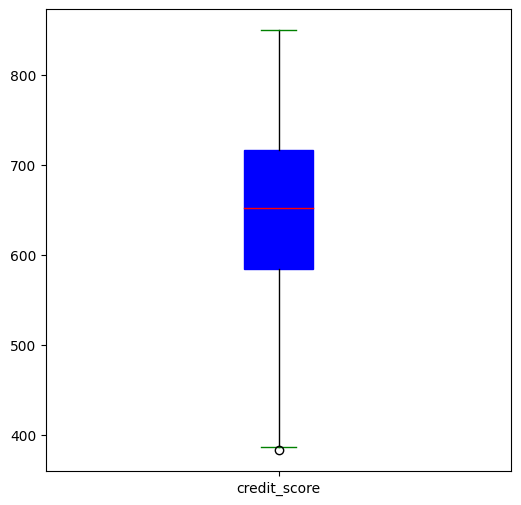

In [58]:
credit_score=df['credit_score']
plt.figure(figsize=(6,6))
props2= dict(boxes='blue',whiskers='black',medians='red',caps='green')
credit_score.plot.box(color=props2,patch_artist=True,vert=True)

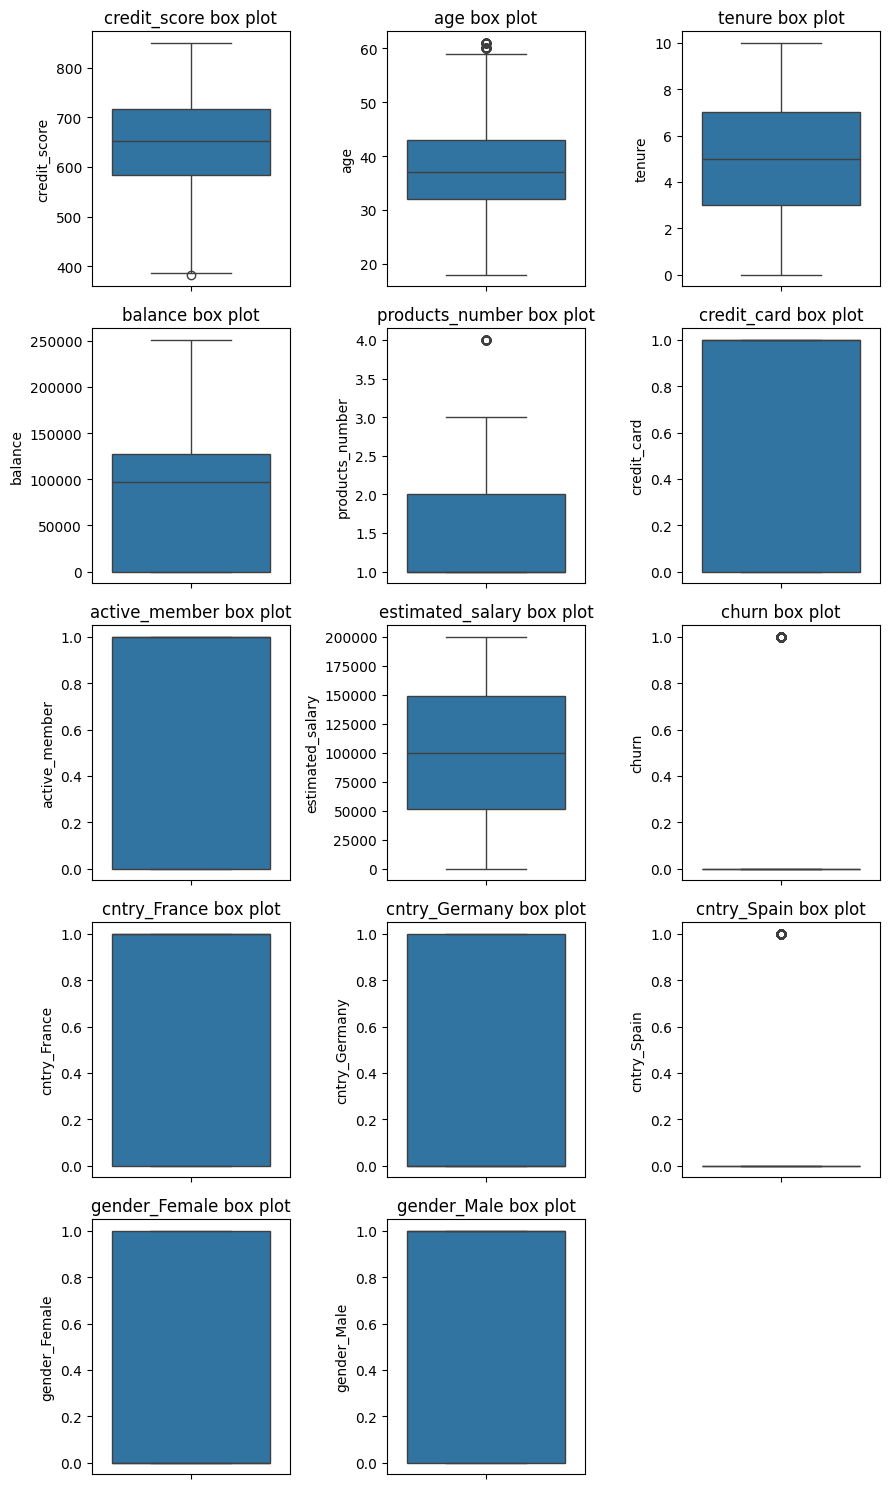

In [59]:
cols = 3
rows = ((len(df.columns) - 1) // cols) + 1
counter = 1

# Adjust the figure size based on the number of columns and rows
fig_width = 3 * cols
fig_height = 3 * rows

# Reduce the figure size if it exceeds the limit
if fig_width > 2**16 or fig_height > 2**16:
    scale_factor = min(2**16 / fig_width, 2**16 / fig_height)
    fig_width *= scale_factor
    fig_height *= scale_factor

plt.rcParams['figure.figsize'] = [fig_width, fig_height]

for c in df.columns:
    plt.subplot(rows, cols, counter)
    sns.boxplot(df[c])
    plt.title("{} box plot".format(c), size=12)
    counter += 1

plt.tight_layout()
plt.show()


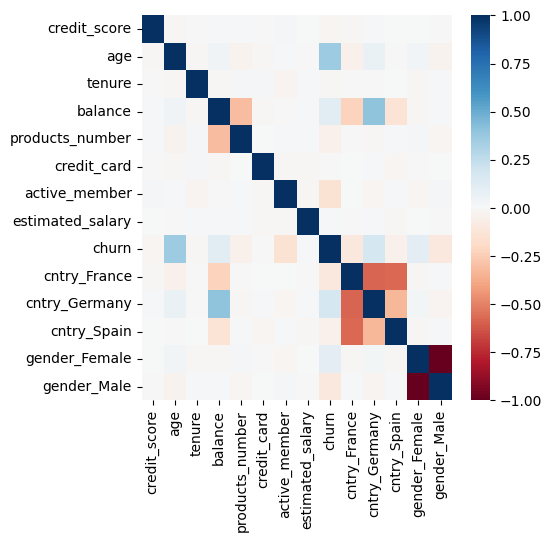

In [60]:
plt.rcParams['figure.figsize']=[5, 5]
sns.heatmap(df.corr(), fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'RdBu');

# Building Model After Removing Outliers

In [61]:
copy_dfdf = df.copy()
X = copy_dfdf.drop(['churn'],axis=1).copy()
y = copy_dfdf['churn'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [62]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)

lg_predict = my_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test,lg_predict)

print("training data score: {:,.3%}".format(my_logreg.score(X_train, y_train)))
print("test data score: {:,.3%}".format(my_logreg.score(X_test, y_test)))
print("The accuracy is " ,"{:.1f}".format(accuracy_logreg*100), "%")


prob = my_logreg.predict_proba(X_test)

training data score: 79.841%
test data score: 81.514%
The accuracy is  81.5 %


In [63]:
perm = PermutationImportance(my_logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0305 ± 0.0103,age
0.0119 ± 0.0109,credit_score
0.0057 ± 0.0053,balance
0.0002 ± 0.0039,estimated_salary
0 ± 0.0000,gender_Male
0 ± 0.0000,gender_Female
0 ± 0.0000,cntry_Spain
0 ± 0.0000,cntry_Germany
0 ± 0.0000,cntry_France
0 ± 0.0000,active_member


**Random Forest**

In [64]:
my_rf = RandomForestClassifier()
my_rf.fit(X_train,y_train)

y_predict_rf = my_rf.predict(X_test)
print(y_predict_rf)

accuracy_rf = accuracy_score(y_test, y_predict_rf)


print("training data score: {:,.3%}".format(my_rf.score(X_train, y_train)))
print("test data score: {:,.3%}".format(my_rf.score(X_test, y_test)))
print("The accuracy is " ,"{:.1f}".format(accuracy_rf*100), "%")

[1 0 0 ... 0 1 0]
training data score: 99.987%
test data score: 85.796%
The accuracy is  85.8 %


In [65]:
perm = PermutationImportance(my_rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0589 ± 0.0065,age
0.0519 ± 0.0117,products_number
0.0142 ± 0.0048,active_member
0.0117 ± 0.0066,balance
0.0042 ± 0.0024,cntry_Germany
0.0026 ± 0.0015,cntry_Spain
0.0019 ± 0.0040,estimated_salary
0.0010 ± 0.0040,credit_score
-0.0013 ± 0.0030,credit_card
-0.0014 ± 0.0081,tenure


# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

# Using Median imputation Method to replace null values

In [66]:
# For 1%
data1 = dataset_original.copy()

# For 5%
data5 = dataset_original.copy()

# For 10%
data10 = dataset_original.copy()

In [67]:
# Removing 1% data from column
df_percent1 = data1['products_number'].sample(frac = 0.01)
#using location of fraction data to set null
data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN

# Removing 5% data from column
df_percent5 = data5['products_number'].sample(frac = 0.05)
#using location of fraction data to set null
data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN

# Remoivng 10% data from column
df_percent10 = data10['products_number'].sample(frac = 0.1)
#using location of fraction data to set null
data10['products_number'].loc[data10.index.isin(df_percent10.index)] = np.NaN

<ipython-input-67-6dfe970b82ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN
<ipython-input-67-6dfe970b82ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN
<ipython-input-67-6dfe970b82ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data10['products_number'].loc[data10.index.is

In [68]:
# For 1%
data1['products_number'].isnull().sum()

100

In [69]:
# For 5%
data5['products_number'].isnull().sum()

500

In [70]:
# For 10%
data10['products_number'].isnull().sum()

1000

In [71]:
# Median
# For 1%
data1['products_number']=data1['products_number'].fillna(data1['products_number'].median())

# For 5%
data5['products_number']=data5['products_number'].fillna(data5['products_number'].median())

# For 10%
data10['products_number']=data10['products_number'].fillna(data10['products_number'].median())


In [72]:
#checking recovery after median imputation in column
print(data1['products_number'].isnull().sum())
print(data5['products_number'].isnull().sum())
print(data10['products_number'].isnull().sum())

0
0
0


In [73]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [74]:
# Percentage of Residual errors at 1%, 5% and 10% data for products_number
MAPE(df_percent1, data1['products_number']), MAPE(df_percent5, data5['products_number']), MAPE(df_percent10, data5['products_number'])

(22.25, 25.099999999999994, 1.6166666666666667)

# Using Mean imputation Method to replace null values

In [82]:
# Removing 1% data from column
df_percent1 = data1['products_number'].sample(frac = 0.01)
#using location of fraction data to set null
data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN

# Removing 5% data from column
df_percent5 = data5['products_number'].sample(frac = 0.05)
#using location of fraction data to set null
data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN

# Remoivng 10% data from column
df_percent10 = data10['products_number'].sample(frac = 0.1)
#using location of fraction data to set null
data10['products_number'].loc[data10.index.isin(df_percent10.index)] = np.NaN

<ipython-input-82-6dfe970b82ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN
<ipython-input-82-6dfe970b82ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN
<ipython-input-82-6dfe970b82ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data10['products_number'].loc[data10.index.is

In [84]:
# For 1%
data1['products_number'].isnull().sum()

100

In [85]:
# For 5%
data5['products_number'].isnull().sum()

500

In [86]:
# For 10%
data10['products_number'].isnull().sum()

1000

In [87]:
#Mean
# For 1%
data1['products_number'] = data1['products_number'].fillna(data1['products_number'].mean())

# For 5%
data5['products_number'] = data5['products_number'].fillna(data5['products_number'].mean())

# For 10%
data10['products_number'] =data10['products_number'].fillna(data10['products_number'].mean())


In [88]:
#checking recovery after Mean imputation in column

print(data1['products_number'].isnull().sum())
print(data5['products_number'].isnull().sum())
print(data10['products_number'].isnull().sum())

0
0
0


In [89]:
# Percentage Residual Error
MAPE(df_percent1, data1['products_number']), MAPE(df_percent5, data5['products_number']), MAPE(df_percent10, data10['products_number'])

(40.68742424242424, 38.89586666666667, 39.3675925925926)

# Using Mode imputation Method to replace null values

In [90]:
# Removing 1% data from column
df_percent1 = data1['products_number'].sample(frac = 0.01)
#using location of fraction data to set null
data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN

# Removing 5% data from column
df_percent5 = data5['products_number'].sample(frac = 0.05)
#using location of fraction data to set null
data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN

# Remoivng 10% data from column
df_percent10 = data10['products_number'].sample(frac = 0.1)
#using location of fraction data to set null
data10['products_number'].loc[data10.index.isin(df_percent10.index)] = np.NaN

<ipython-input-90-6dfe970b82ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN
<ipython-input-90-6dfe970b82ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN
<ipython-input-90-6dfe970b82ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data10['products_number'].loc[data10.index.is

In [ ]:
#For 1%
data1['products_number'].isnull().sum()

In [91]:
#For 5%
data5['products_number'].isnull().sum()

500

In [92]:
#For 10%
data10['products_number'].isnull().sum()

1000

In [101]:
# For 1%
data1['products_number'] = data1['products_number'].fillna(data1['products_number'].mode().iloc[0])

# For 5%
data5['products_number'] = data5['products_number'].fillna(data5['products_number'].mode().iloc[0])

# For 10%
data10['products_number'] = data10['products_number'].fillna(data10['products_number'].mode().iloc[0])

In [102]:
#checking recovery after Mode imputation in column

print(data1['products_number'].isnull().sum())
print(data5['products_number'].isnull().sum())
print(data10['products_number'].isnull().sum())

0
0
0


In [103]:
# Percentage Residual Error
MAPE(df_percent1, data1['products_number']), MAPE(df_percent5, data5['products_number']), MAPE(df_percent10, data10['products_number'])

(23.677791021056812, 23.570405159119584, 22.775609756097563)

**What are the data types?**

The data types are integer, float and object.

Numerical Columns:
*   gender
*   country

Categorical Columns:
*  customer_id
*  credit_score
*  age
*  tenure
*  balance
*  products number
*  credit card
*  active member
*  estimated salary
*  churn

**Are there missing values?**

No there are no missing values in dataset.

**What are the likely distributions of the numeric variables?**

Most of the data is normally distributed except for outliers

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

The important variables are:

cntry_Germany (0.17)

gender_Female (0.6)

churn (0.54)

age (0.29)

cntry_France (0.1)

active_member (0.16)

**Which independent variables have missing data? How much?**

There are no columns with any missing values

**Do the training and test sets have the same data?**

80-20 splitting of the data is done using train_test_split from sklearn.model_selection, the train and test data sets follow the same distribution. Also, by looking at the graphs, we observe similar distribution in the train and test data. So it can be inferred that they have the same data

**In the predictor variables independent of all the other predictor variables?**

No, multicollinearity exists in the data. We also see that the balance and cntry_Germany are highly correlated

**Which predictor variables are the most important?**

age 28.53

cntry_Germany 17.35

active_member 15.61

balance 11.85

gender_Female 10.65

gender_Male 10.65

cntry_France 10.50

The above five columns are the important one because they are highly correlated with the target variable but since none of them are above 35% we can conclude that data is less correlated.

**What are the distributions of the predictor variables?**

We can see that all are normally distributed except balance, age are left skewed.

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

**Before removing outliers the accuracy model is:**

Logistic Regression:
*   training data score: 78.763%
*   test data score: 80.050%
*   test data score: 80.050%

Random Forest:
*   training data score: 99.987%
*   test data score: 86.500%
*   The accuracy is  86.5 %

**After removing outliers the accuracy model is:**

Logistic Regression:
*   training data score: 79.841%
*   test data score: 81.514%
*   The accuracy is  81.5 %

Random Forest:
*   training data score: 100.000%
*   test data score: 86.371%
*   The accuracy is  86.4 %





 **Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.**

 We observe that, Imputation by Mean gives us the least Residual Error compared to replacing values by Median and Mode imputer.

**References**

Referred the following links to understand the functions or the processes that are going to be required during the problem analysis.

Scikit-learn Documentation

Pandas Official Documentation

Analytics Vidya

medium: towardsdatascience

Seaborn: statistical data visualization

geeksforgeeks

MIT License

Copyright (c) 2024 anshvaghela2099

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.